In [1]:
import default_settings

1) Load in data from url

In [131]:
cols = 'GameNum Date Round HomeTeam HomeScore AwayTeam AwayScore Venue'
data = pd.read_csv('https://afltables.com/afl/stats/biglists/bg3.txt', 
                  skiprows = 2,
                  sep = '[. ] +',
                  names = cols.split(),
                  parse_dates = ['Date'])
data.head()

C:\Users\Justin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue
0,1,1897-05-08,R1,Fitzroy,6.13.49,Carlton,2.4.16,Brunswick St
1,2,1897-05-08,R1,Collingwood,5.11.41,St Kilda,2.4.16,Victoria Park
2,3,1897-05-08,R1,Geelong,3.6.24,Essendon,7.5.47,Corio Oval
3,4,1897-05-08,R1,South Melbourne,3.9.27,Melbourne,6.8.44,Lake Oval
4,5,1897-05-15,R2,South Melbourne,6.4.40,Carlton,5.6.36,Lake Oval


2) How many games have ever been played?

In [132]:
len(data)

15461

3) How many home games has Adelaide played? How about Collingwood?

In [133]:
df = data
len(df[df['HomeTeam'] == 'Adelaide']), len(df[df['HomeTeam'] == 'Collingwood'])

(327, 1261)

4) How many home games has each team played? What about away games?

In [134]:
df.groupby('HomeTeam').size()

HomeTeam
Adelaide            327 
Brisbane Bears      111 
Brisbane Lions      260 
Carlton             1242
Collingwood         1261
Essendon            1237
Fitzroy             968 
Footscray           711 
Fremantle           273 
GW Sydney           83  
Geelong             1213
Gold Coast          91  
Hawthorn            1000
Kangaroos           104 
Melbourne           1211
North Melbourne     877 
Port Adelaide       256 
Richmond            1139
South Melbourne     782 
St Kilda            1185
Sydney              431 
University          63  
West Coast          381 
Western Bulldogs    255 
dtype: int64

In [135]:
df.groupby('AwayTeam').size()

AwayTeam
Adelaide            328 
Brisbane Bears      111 
Brisbane Lions      251 
Carlton             1255
Collingwood         1278
Essendon            1225
Fitzroy             960 
Footscray           720 
Fremantle           276 
GW Sydney           84  
Geelong             1222
Gold Coast          91  
Hawthorn            982 
Kangaroos           105 
Melbourne           1194
North Melbourne     884 
Port Adelaide       257 
Richmond            1122
South Melbourne     788 
St Kilda            1193
Sydney              435 
University          63  
West Coast          379 
Western Bulldogs    258 
dtype: int64

5) Create columns for: goals, behinds and points for each of home and away teams, called: hg, hb, hp, ag, ab, ap. Save result in data2

In [136]:
df = data.copy()
df['hg'] = df['HomeScore'].map(lambda x: int(x.split('.')[0]))
df['hb'] = df['HomeScore'].map(lambda x: int(x.split('.')[1]))
df['hp'] = df['HomeScore'].map(lambda x: int(x.split('.')[2]))
df['ag'] = df['AwayScore'].map(lambda x: int(x.split('.')[0]))
df['ab'] = df['AwayScore'].map(lambda x: int(x.split('.')[1]))
df['ap'] = df['AwayScore'].map(lambda x: int(x.split('.')[2]))
data2 = df
df.head()

,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue,hg,hb,hp,ag,ab,ap
0,1,1897-05-08,R1,Fitzroy,6.13.49,Carlton,2.4.16,Brunswick St,6,13,49,2,4,16
1,2,1897-05-08,R1,Collingwood,5.11.41,St Kilda,2.4.16,Victoria Park,5,11,41,2,4,16
2,3,1897-05-08,R1,Geelong,3.6.24,Essendon,7.5.47,Corio Oval,3,6,24,7,5,47
3,4,1897-05-08,R1,South Melbourne,3.9.27,Melbourne,6.8.44,Lake Oval,3,9,27,6,8,44
4,5,1897-05-15,R2,South Melbourne,6.4.40,Carlton,5.6.36,Lake Oval,6,4,40,5,6,36


6) Show which games had the top 5 highest and lowest points for home teams?

In [47]:
df = data2
df.sort_values(by = ['hp']).head()

,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue,hg,hb,hp,ag,ab,ap
39,40,1897-07-10,R10,St Kilda,0.3.3,South Melbourne,8.16.64,Junction Oval,0,3,3,8,16,64
1458,1459,1915-06-19,R9,St Kilda,1.1.7,Carlton,5.15.45,Junction Oval,1,1,7,5,15,45
143,144,1899-05-24,R3,Geelong,0.8.8,Fitzroy,4.8.32,Corio Oval,0,8,8,4,8,32
1202,1203,1912-07-13,R12,Melbourne,0.8.8,South Melbourne,13.8.86,M.C.G.,0,8,8,13,8,86
41,42,1897-07-17,R11,Collingwood,0.8.8,South Melbourne,2.15.27,Victoria Park,0,8,8,2,15,27


In [48]:
df.sort_values(by = ['hp']).tail()

,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue,hg,hb,hp,ag,ab,ap
9852,9853,1989-05-13,R7,Geelong,35.18.228,St Kilda,16.13.109,Kardinia Park,35,18,228,16,13,109
10507,10508,1993-05-01,R6,North Melbourne,35.19.229,Sydney,16.9.105,Princes Park,35,19,229,16,9,105
13905,13906,2011-07-30,R19,Geelong,37.11.233,Melbourne,7.5.47,Kardinia Park,37,11,233,7,5,47
9604,9605,1987-07-26,R17,Sydney,36.20.236,Essendon,11.7.73,S.C.G.,36,20,236,11,7,73
8480,8481,1979-07-28,R17,Fitzroy,36.22.238,Melbourne,6.12.48,Waverley Park,36,22,238,6,12,48


7) Do the same as question 6 but for away teams

In [49]:
df = data2
df.sort_values(by = ['ap']).head()

,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue,hg,hb,hp,ag,ab,ap
199,200,1899-09-09,R17,Geelong,23.24.162,St Kilda,0.1.1,Corio Oval,23,24,162,0,1,1
194,195,1899-09-02,R16,Fitzroy,5.10.40,Melbourne,0.2.2,Brunswick St,5,10,40,0,2,2
186,187,1899-08-12,R14,Geelong,16.23.119,St Kilda,0.2.2,Corio Oval,16,23,119,0,2,2
11,12,1897-05-24,R3,South Melbourne,8.11.59,St Kilda,0.2.2,Lake Oval,8,11,59,0,2,2
46,47,1897-07-24,R12,Essendon,13.16.94,St Kilda,0.3.3,East Melbourne,13,16,94,0,3,3


In [137]:
df = data2
df.sort_values(by = ['ap']).tail()

,GameNum,Date,Round,HomeTeam,HomeScore,AwayTeam,AwayScore,Venue,hg,hb,hp,ag,ab,ap
10431,10432,1992-08-01,R20,Essendon,8.8.56,Hawthorn,32.24.216,M.C.G.,8,8,56,32,24,216
8615,8616,1980-07-20,R16,St Kilda,11.4.70,Richmond,34.18.222,S.C.G.,11,4,70,34,18,222
13069,13070,2007-05-06,R6,Richmond,9.11.65,Geelong,35.12.222,Docklands,9,11,65,35,12,222
10164,10165,1991-04-28,R6,Fitzroy,11.8.74,Hawthorn,36.15.231,North Hobart,11,8,74,36,15,231
10344,10345,1992-05-03,R7,Brisbane Bears,11.9.75,Geelong,37.17.239,Carrara,11,9,75,37,17,239


8) On average, what does Adelaide score at home? What about away?

In [138]:
df = data2
df = df[df['HomeTeam'] == 'Adelaide']
df['hp'].mean(), df['ap'].mean()

(100.96330275229357, 79.80122324159021)

9) Plot how has Adelaide's HomeScore has changed over time

In [139]:
%matplotlib inline

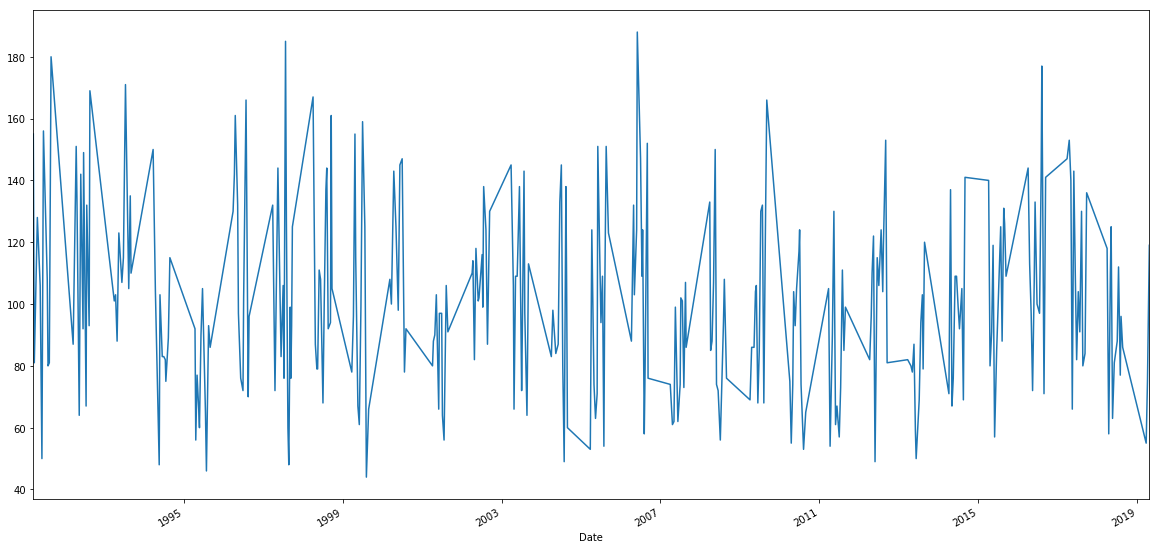

In [140]:
df.set_index('Date')['hp'].plot(figsize = (20, 10))

9) Plot how has Adelaide's 10 game average HomeScore has changed over time. What about 50 game, and 100 game average?

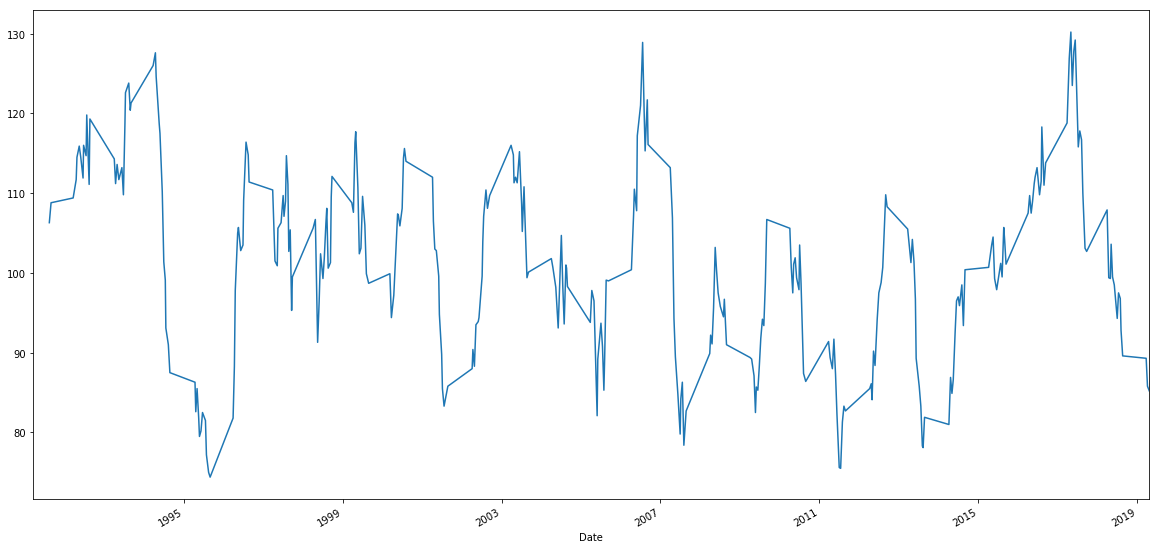

In [143]:
df.set_index('Date')['hp'].rolling(10).mean().plot(figsize = (20, 10))

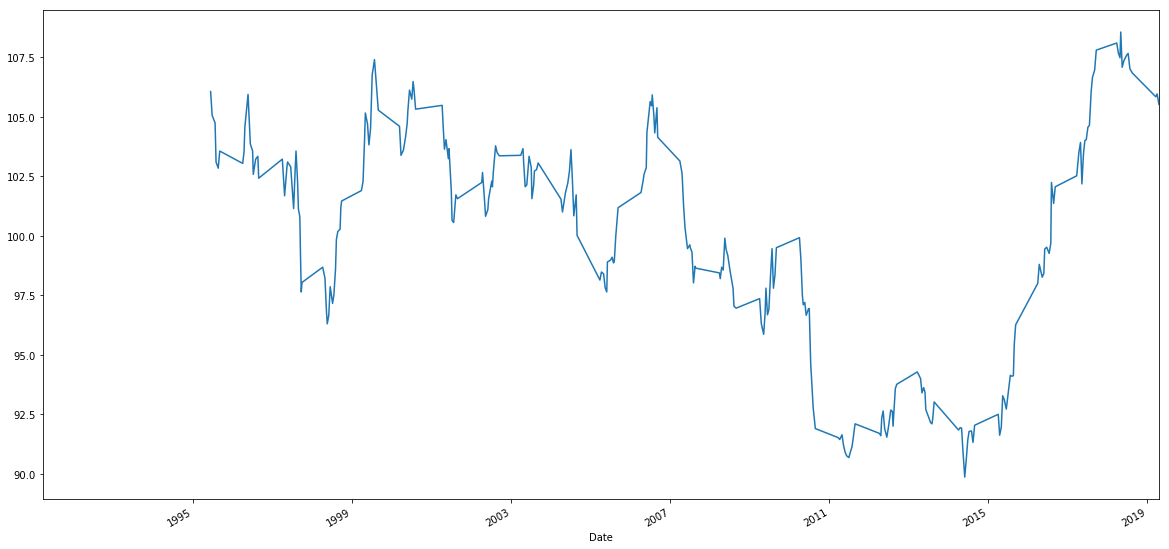

In [144]:
df.set_index('Date')['hp'].rolling(50).mean().plot(figsize = (20, 10))

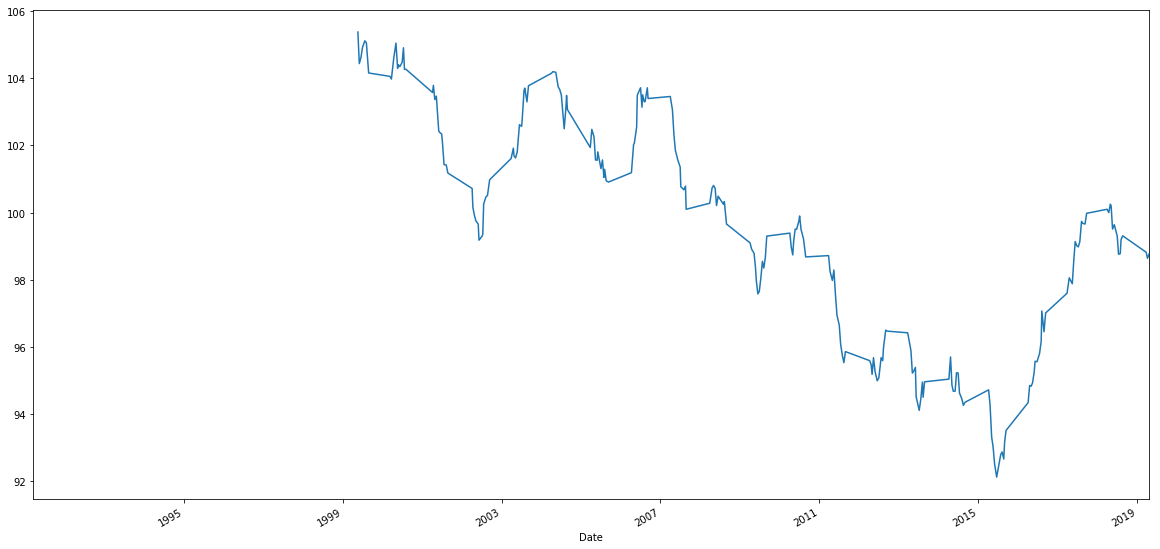

In [145]:
df.set_index('Date')['hp'].rolling(100).mean().plot(figsize = (20, 10))

10) Rank teams by best home team performers to worse by the points they scored

In [155]:
df = data2
df.groupby('HomeTeam')['hp'].mean().sort_values(ascending = False)

HomeTeam
West Coast          104.123360
Sydney              102.770302
Adelaide            100.963303
Kangaroos           100.865385
Western Bulldogs    100.752941
Brisbane Bears      99.549550 
Brisbane Lions      99.484615 
Port Adelaide       95.542969 
Hawthorn            94.520000 
Richmond            92.859526 
Essendon            91.987874 
Collingwood         91.637589 
Fremantle           91.575092 
Carlton             90.702093 
Geelong             90.187964 
GW Sydney           88.783133 
North Melbourne     88.612315 
Melbourne           86.109827 
St Kilda            81.907173 
Footscray           81.817159 
Fitzroy             81.373967 
Gold Coast          79.802198 
South Melbourne     79.257033 
University          50.460317 
Name: hp, dtype: float64

11) Rank teams by the worst away team performers to best by the points they conceeded

In [158]:
df.groupby('AwayTeam')['hp'].mean().sort_values(ascending = False)

AwayTeam
Brisbane Bears      115.963964
Gold Coast          110.615385
GW Sydney           103.023810
Kangaroos           103.009524
Brisbane Lions      101.549801
Fremantle           101.460145
Western Bulldogs    98.949612 
Port Adelaide       98.607004 
North Melbourne     97.811086 
Adelaide            97.600610 
Footscray           95.516667 
Sydney              94.967816 
West Coast          94.596306 
St Kilda            93.636211 
Hawthorn            93.356415 
Richmond            89.125668 
Geelong             88.128478 
Melbourne           87.773032 
Fitzroy             85.516667 
Essendon            83.604082 
South Melbourne     82.156091 
Carlton             81.372112 
Collingwood         81.323944 
University          73.587302 
Name: hp, dtype: float64

12) Same as 10 and 11, but for goals

In [159]:
df.groupby('HomeTeam')['hg'].mean().sort_values(ascending = False)

HomeTeam
West Coast          15.141732
Sydney              14.886311
Kangaroos           14.836538
Western Bulldogs    14.725490
Adelaide            14.620795
Brisbane Bears      14.450450
Brisbane Lions      14.369231
Port Adelaide       13.871094
Hawthorn            13.572000
Fremantle           13.278388
Richmond            13.213345
Essendon            13.137429
Collingwood         12.999207
Carlton             12.884058
Geelong             12.869744
GW Sydney           12.795181
North Melbourne     12.620296
Melbourne           12.269199
St Kilda            11.643038
Footscray           11.583685
Gold Coast          11.439560
Fitzroy             11.420455
South Melbourne     11.108696
University          6.841270 
Name: hg, dtype: float64

In [161]:
df.groupby('AwayTeam')['hg'].mean().sort_values(ascending = False)

AwayTeam
Brisbane Bears      16.783784
Gold Coast          16.186813
Kangaroos           15.180952
GW Sydney           15.071429
Fremantle           14.833333
Brisbane Lions      14.820717
Western Bulldogs    14.403101
Port Adelaide       14.392996
Adelaide            14.219512
North Melbourne     14.003394
West Coast          13.746702
Sydney              13.714943
Footscray           13.586111
St Kilda            13.354568
Hawthorn            13.302444
Richmond            12.719251
Geelong             12.523732
Melbourne           12.491625
Fitzroy             12.087500
Essendon            11.853878
Carlton             11.519522
Collingwood         11.504695
South Melbourne     11.497462
University          10.111111
Name: hg, dtype: float64

13) What is the most inaccurate team (by behinds to points ratio) at home? What about for away?

In [162]:
df = data2
df['home inaccuracy'] = df['hb'] / df['hp']
df.groupby('HomeTeam')['home inaccuracy'].mean().sort_values(ascending = False)

HomeTeam
University          0.209747
South Melbourne     0.172938
Fitzroy             0.172083
St Kilda            0.165621
Footscray           0.163132
Collingwood         0.162660
Carlton             0.161611
Melbourne           0.159577
Geelong             0.157432
Essendon            0.157315
North Melbourne     0.156170
Richmond            0.155813
Gold Coast          0.152505
Hawthorn            0.148759
GW Sydney           0.143888
Brisbane Lions      0.141779
Adelaide            0.140930
Port Adelaide       0.138621
Sydney              0.138308
Fremantle           0.136707
Brisbane Bears      0.135793
West Coast          0.134228
Western Bulldogs    0.129825
Kangaroos           0.121979
Name: home inaccuracy, dtype: float64

In [163]:
df['away inaccuracy'] = df['ab'] / df['ap']
df.groupby('HomeTeam')['away inaccuracy'].mean().sort_values(ascending = False)

HomeTeam
University          0.191429
Fitzroy             0.176768
South Melbourne     0.174653
Collingwood         0.171531
Carlton             0.169668
Geelong             0.168903
Essendon            0.166096
St Kilda            0.165104
Footscray           0.164744
Melbourne           0.161332
Richmond            0.158425
North Melbourne     0.156595
Hawthorn            0.152554
Gold Coast          0.147226
Sydney              0.146759
Brisbane Bears      0.144669
Adelaide            0.143439
Fremantle           0.143394
GW Sydney           0.142286
West Coast          0.141412
Port Adelaide       0.140777
Brisbane Lions      0.140704
Kangaroos           0.128615
Western Bulldogs    0.126233
Name: away inaccuracy, dtype: float64

14) Create 2 dataframes called home = all columns and home score, similarly away for away columns

In [100]:
df = data2
home = df[['GameNum', 'Date', 'Round', 'HomeTeam', 'hg', 'hb', 'hp']]
away = df[['GameNum', 'Date', 'Round', 'AwayTeam', 'ag', 'ab', 'ap']]

15) Give both dataframes from 14 a new column caled 'home' which is true in home dataframe, and false in away

In [101]:
home['home'] = True
away['home'] = False

C:\Users\Justin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Justin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


16) Rename columns of both home and away to be the same: 'GameNum', 'Date', 'Round', 'Team', 'g', 'b', 'p', 'home'

In [102]:
cols = ['GameNum', 'Date', 'Round', 'Team', 'g', 'b', 'p' ,'home']
home.columns = cols
away.columns = cols
home.head()

,GameNum,Date,Round,Team,g,b,p,home
0,1,1897-05-08,R1,Fitzroy,6,13,49,True
1,2,1897-05-08,R1,Collingwood,5,11,41,True
2,3,1897-05-08,R1,Geelong,3,6,24,True
3,4,1897-05-08,R1,South Melbourne,3,9,27,True
4,5,1897-05-15,R2,South Melbourne,6,4,40,True


17) Join home dataframe on top of away, and save in data3 (using append or concat)

In [164]:
data3 = home.append(away)
print(len(data3))
data3.head()

30922


,GameNum,Date,Round,Team,g,b,p,home
0,1,1897-05-08,R1,Fitzroy,6,13,49,True
1,2,1897-05-08,R1,Collingwood,5,11,41,True
2,3,1897-05-08,R1,Geelong,3,6,24,True
3,4,1897-05-08,R1,South Melbourne,3,9,27,True
4,5,1897-05-15,R2,South Melbourne,6,4,40,True


18) What are the average scores for each Round?

In [107]:
df = data3
df.groupby('Round').mean()['p'].sort_values()

Round
SF     79.015936 
GF     79.199187 
R12    80.245192 
R13    80.826630 
R14    81.152322 
R9     82.403664 
R15    82.793956 
R8     83.147696 
PF     83.293233 
R10    83.378562 
R11    83.409465 
R4     84.692513 
R16    84.746217 
R7     84.890013 
R6     84.995979 
R5     85.029412 
R17    85.578691 
R3     86.338667 
R18    86.348958 
R2     86.712667 
R1     87.900538 
QF     91.617647 
R19    92.245658 
EF     93.317460 
R23    94.815217 
R21    96.824930 
R20    96.895722 
R22    98.544818 
R24    102.603448
Name: p, dtype: float64

19) What is the average score for Adelaide in Season 2017? What about Collingwood in the same year?

In [113]:
df = data3
df = df[df['Date'].dt.year == 2017]
df[df['Team'] == 'Adelaide']['p'].mean(), df[df['Team'] == 'Collingwood']['p'].mean()

(107.8, 88.36363636363636)

20) Plot a graph of the average scores per season (across all clubs) over time? Then do the same for 10 and 20 year rolling average.

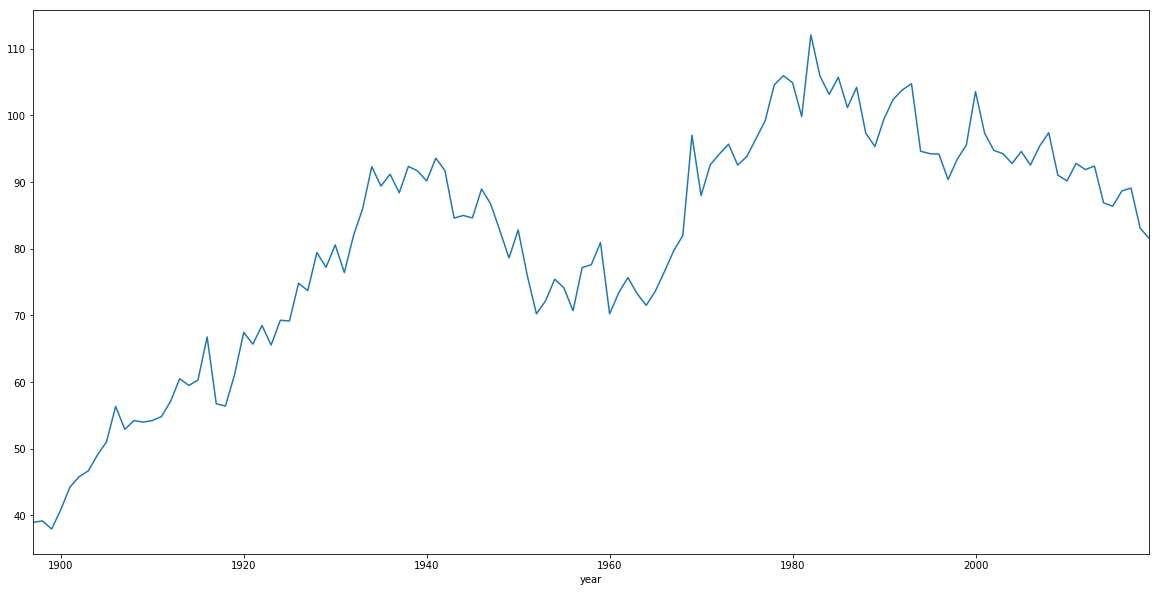

In [127]:
df = data3.copy()
df['year'] = df['Date'].dt.year
df.groupby('year')['p'].mean().plot(figsize = (20, 10))

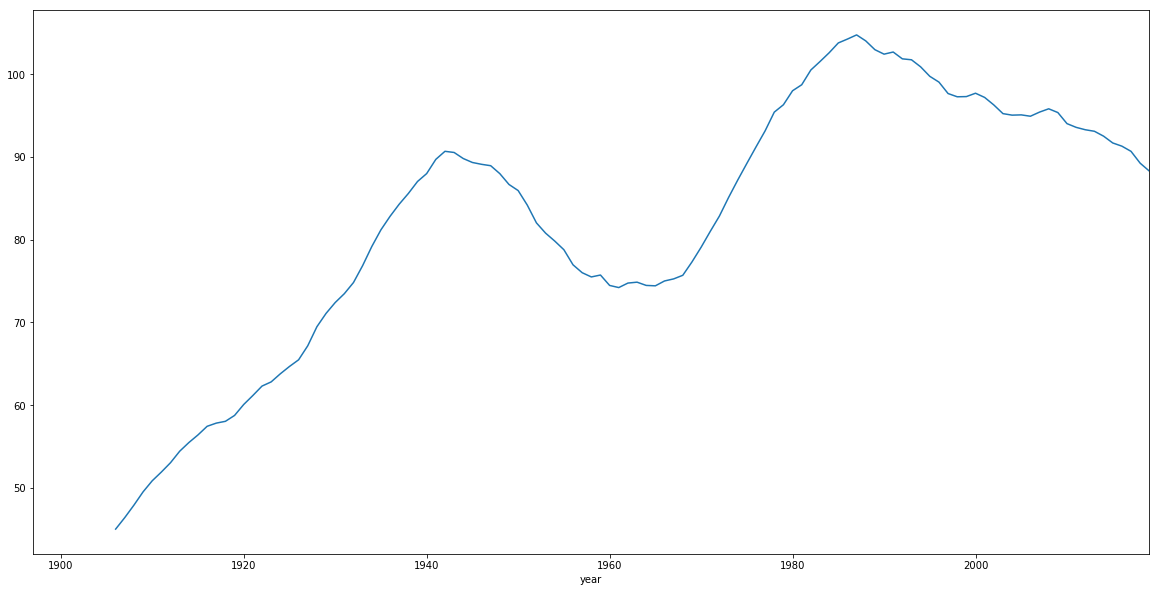

In [129]:
df.groupby('year')['p'].mean().rolling(10).mean().plot(figsize = (20, 10))

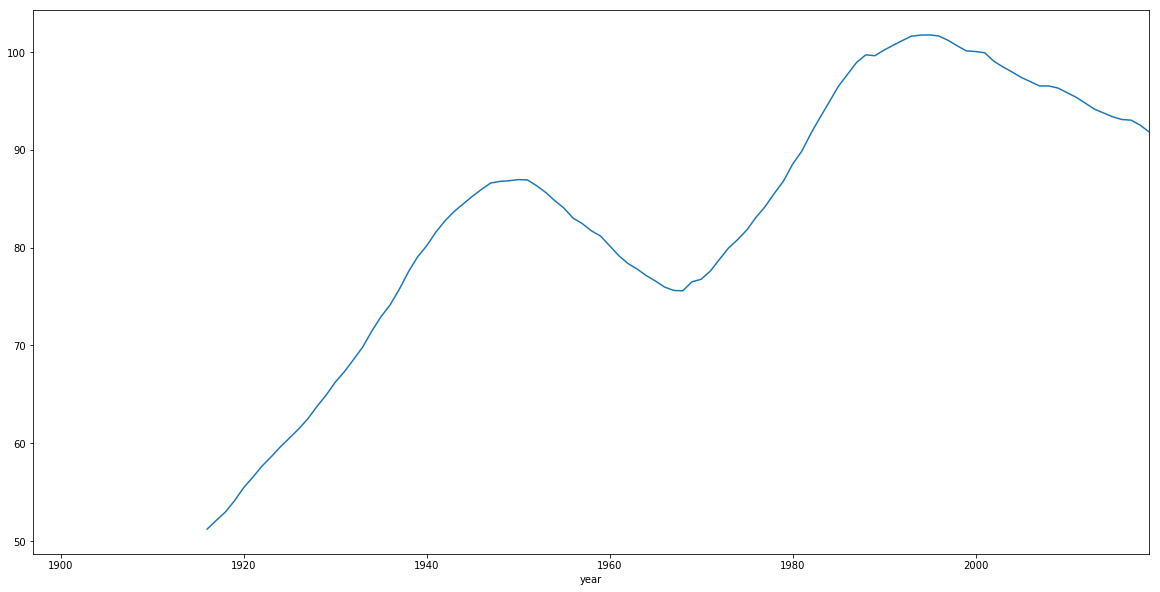

In [130]:
df.groupby('year')['p'].mean().rolling(20).mean().plot(figsize = (20, 10))